<a href="https://colab.research.google.com/github/zrajaei/rgb2heatmap/blob/main/rgb2heatmap_test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>🔍 Overview</h1>
<p>This repository generates smooth attention heatmaps from object detection results.
    It supports:
    <ul>
        <li>Input images and COCO-format bounding boxes</li>
        <li>Gaussian-based heatmap generation per object</li>
        <li>Central region focus via area_ratio</li>
        <li>Simple inference pipeline via JSON config</li>
    </ul>
</p>

<h1>Generate Heatmap</h1>
<p>In some applications, such as visual analytics for marketing, it is valuable to visualize object presence or attention focus via a heatmap. This algorithm creates a smooth heatmap over each detected object based on its bounding box (bbox).</p>

<h2>⚙️ Algorithm Steps:</h2>

<ol>
    <li><h3>Input:</h3></li>
    <ul>
        <li>An image (as a NumPy array)</li>
        <li>A list of bboxes, each in format <code>[x, y, width, height]</code></li>
    </ul>
    <li><h3>Generate heatmap for each bbox:</h3></li>
    <ol>
            <li><h4 id="extract_central_region">Extract the cetral region per bbox</h4>
             <p>We extract a central region for each bbox based on an area_ratio, according to the following steps:</p>
                <ol>
                    <li>Compute the center of the bbox <code>(center_x, center_y)</code></li>
                    <li>Calculate the area of the bbox:</li>
                    <div style="text-align:center; font-family: 'Times New Roman', serif; font-size: 1.2em;">
                    <i><b>central_region_area</b></i> = <i><b>area</b></i> × <i><b>area_ratio</b></i>
                    </div>
                    <li>Calculate the side length of the square:</li>
                    <div style="text-align:center; font-family: 'Times New Roman', serif; font-size: 1.2em;">
                    <i><b>central_region_side</b></i> = &radic;<i><b>central_region_area</b></i>
                    </div>
                    <li>Define a square region centered at (center_x, center_y) with side length side_length</li>
                </ol>
                <p><b>The result after first step:</b></p>
                <div style="text-align: center;">
                <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/extract_central_region.gif" alt="Extract Central Region" style="max-width: 100%; height: auto;">
                </div>
             </li>
             <li><h4>Select a random point inside the central region</h4>
             <p>Randomly selected a pixel coordinate inside the central region.</p>
            <p><b>The result after second step:</b></p>
             <div style="text-align: center;">
             <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/select_random_point.gif" alt="Select Random Point" style="max-width: 100%; height: auto;">
             </div>
             </li>
             <li><h4 id="generate_gaussian_heatmap">Generate Gaussian Heatmap</h4>
             <p>We generate a smooth 2D Gaussian heatmap centered on the selected pixel inside the bbox. This heatmap visually highlights the object with intensity fading outwards. To adapt to different object sizes and add slight randomness, we scale the Gaussian standard deviations (<code>sigma_x</code>, <code>sigma_y</code>) by a factor randomly sampled around the provided <code>sigma_ratio</code> (±0.1).</p>
             <p><b>The heatmap generation follows these steps:</b></p>
             <ol>
                <li>Sample a scaling factor <code>alpha</code> uniformly between <code>sigma_ratio - 0.1</code> and <code>sigma_ratio + 0.1</code>.</li>
                <li>Compute <code>sigma_x = alpha × bbox_width</code> and <code>sigma_y = alpha × bbox_height</code>.</li>
                <li>
                    For every pixel coordinate <code>(x, y)</code> on the <b>bbox</b> grid, calculate the heatmap value using the Gaussian formula:<br><br>
                    <div style="text-align: center;">
                    <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/gaussian_distribution.png" alt="Gaussian Distribution" style="max-width: 100%; height: auto;">
                    </div>
                </li>
            </ol>
            <p><b>Note</b> : Some bboxes may overlap in the image. When this happens, the corresponding heatmaps will also overlap. To accurately represent the combined intensity, we take the maximum value between overlapping heatmaps at each pixel, rather than summing them. This prevents artificially inflated values in the heatmap visualization.</p>
            </li>
            <li><h4>Normalize heatmap values</h4>
            <p>To scale the heatmap values to a consistent range for visualization and comparison, we apply min-max normalization. This rescales all heatmap values to the range <code>[0,1]</code> by subtracting the minimum value and dividing by the range:</p>
            <p align="center">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/normalization.png" alt="Normalization" style="max-width: 100%; height: auto;">
            </p>
            <p><b>The result after fourth step:</b></p>
            <div style="text-align: center;">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/generate_gaussian_heatmap.gif" alt="Generate Gaussian Heatmap" style="max-width: 100%; height: auto;">
            </div>
            </li>
    </ol>
            <li><h3>Visualization</h3><p>The final result will be as follows:<p>
            <div style="text-align: center;">
            <img src="https://github.com/saiwa-ai/rgb2heatmap/raw/main/data/final_result.png" alt="Generate Gaussian Heatmap" style="max-width: 100%; height: auto;">
            </div>
            </li>
</ol>
<br/>


<h2>📄 Parameter Description</h2>

<p><strong>🔔 Notes:</strong></p>
<ol>
  <li><code>input_annotation_path</code><strong>must</strong> follow the <strong>COCO format</strong>.</li>
  <li>If your annotations are in the <a href="https://saiwa.ai/fraime/">Fraime</a> platform format, you can convert them to COCO using the
    <code>convert_fraime_to_coco.py</code> script located in the <code>utils/</code> directory.
  </li>
</ol>

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Key</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>input_annotation_path</code></td>
      <td>str</td>
      <td>Path to the COCO-formatted annotation file corresponding to the input image.</td>
    </tr>
    <tr>
      <td><code>image_path</code></td>
      <td>str</td>
      <td>Path to the image on which you want to run inference.</td>
    </tr>
    <tr>
      <td><code>output_dir</code></td>
      <td>str</td>
      <td>Directory where the output (the image) will be saved</td>
    </tr>
    <tr>
      <td><code>area_ratio</code></td>
      <td>float</td>
      <td>
        This parameter defines the relative area used when extracting the central region of each bounding box.<br/>
        For more information, please refer to <a href="#extract_central_region">Extract Central Region</a>.
      </td>
    </tr>
    <tr>
      <td><code>sigma_ratio</code></td>
      <td>float</td>
      <td>
        This parameter controls the spread of the Gaussian kernel during heatmap generation.<br/>
        For more information, please refer to <a href="#generate_gaussian_heatmap">Generate Gaussian Heatmap</a>.
      </td>
    </tr>
  </tbody>
</table>




In [1]:
# Clone the repository
!git clone https://github.com/saiwa-ai/rgb2heatmap.git


Cloning into 'rgb2heatmap'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 9), reused 34 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 34.09 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [1]:
# Change into the repository directory and install dependencies
%cd rgb2heatmap
# Install required packages
!pip install -r requirements.txt

/content/rgb2heatmap


/content/rgb2heatmap


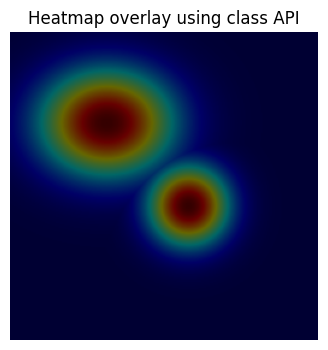

In [6]:
# Import necessary libraries
%cd /content/rgb2heatmap
import numpy as np
import cv2
from heatmap_pipeline.heatmap_generation import Heatmap
import matplotlib.pyplot as plt

# Create a black image
image = np.zeros((256, 256, 3), dtype=np.uint8)

# Define sample bounding boxes: list of [x, y, width, height]
bboxes = np.array([
    [50, 50, 100, 80],
    [120, 120, 60, 60]
])

# Create and run the heatmap generator
hm = Heatmap()
result = hm.run(image.copy(), bboxes, area_ratio=0.2, sigma_ratio=0.3)

# Display the result
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Heatmap overlay using class API')
plt.show()


{
 "success": true,
 "result": "Saved heatmap overlay to: outputs/sample_image.jpg",
 "error": null
}


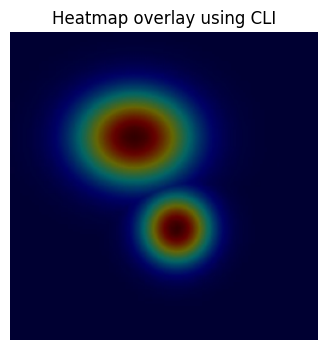

In [3]:
# Generate a sample image and COCO annotation to test the run_app script
import json
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ensure the outputs directory exists
os.makedirs('outputs', exist_ok=True)

# Create a sample image and save it
sample_img = np.zeros((256, 256, 3), dtype=np.uint8)
cv2.imwrite('sample_image.jpg', sample_img)

# Create a simple COCO-style annotation
sample_coco = {
    "images": [
        {"id": 1, "file_name": "sample_image.jpg", "width": 256, "height": 256}
    ],
    "annotations": [
        {"id": 0, "image_id": 1, "category_id": 1, "bbox": [50, 50, 100, 80], "area": 100*80, "segmentation": [], "iscrowd": 0},
        {"id": 1, "image_id": 1, "category_id": 1, "bbox": [120, 120, 60, 60], "area": 60*60, "segmentation": [], "iscrowd": 0}
    ],
    "categories": [
        {"id": 1, "name": "object"}
    ]
}

with open('sample_coco.json', 'w') as f:
    json.dump(sample_coco, f)

# Create a configuration file for run_app.py
config = {
    "input_annotation_path": "sample_coco.json",
    "image_path": "sample_image.jpg",
    "output_dir": "outputs",
    "area_ratio": 0.2,
    "sigma_ratio": 0.3
}

with open('sample_config.json', 'w') as f:
    json.dump(config, f, indent=2)

# Run the application using the configuration file
!python run_app.py sample_config.json

# Load and display the resulting image
out_img = cv2.imread('outputs/sample_image.jpg')
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Heatmap overlay using CLI')
plt.show()
